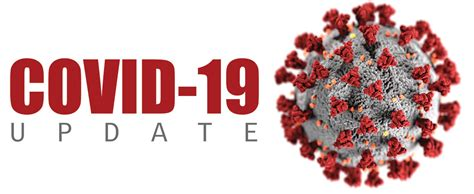

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from yellowbrick.regressor import residuals_plot
import matplotlib.pyplot as plt
import pandas_profiling
import folium

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Dataset overview

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/11-4-20 covid US case  deaths.csv')
report = pandas_profiling.ProfileReport(df)

In [ ]:
from IPython.display import display
display(report)

In [ ]:
df.info()

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')
df.head()

# Line plotly

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')

fig = go.Figure(go.Scatter(x = df['Total Cases'], y = df['Total Deaths'],
                  name='Number of Cases & Deaths '))

fig.update_layout(title='Number of Cases & Deaths (September)',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)

fig.show()

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')
fig = px.area(df, x="Total Deaths", y="Total Cases", color="State Region",
	      line_group="State/Territory")
fig.show()

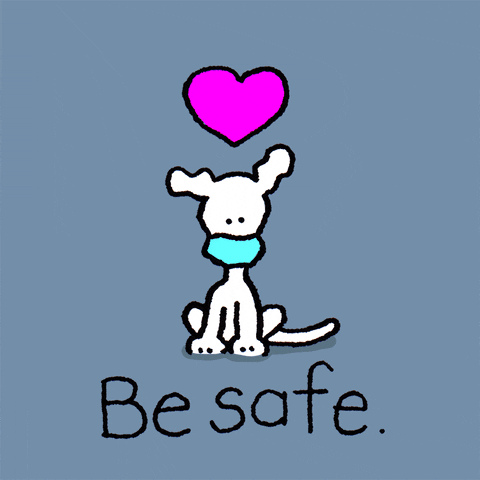

# Scatter plotly 3-d

* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale: actually it is 4th dimension

In [ ]:
# create trace 1 that is 3d scatter
dataframe = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')
trace1 = go.Scatter3d(
    x=dataframe['Total Cases'],
    y=dataframe['State/Territory'],
    z=dataframe['State Region'],
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,17,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
# this is a simplier and more detailed, colored than the one at top
df = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')
fig = px.scatter_3d(df, x='Total Cases', y='State/Territory', z='State Region',
                    color='Total Deaths')
fig.show()

This information is from October. This is the same, but different numbers. That way you can compare how much cases and death there are.

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/10-2-20 covid19 cases and deaths.csv')
fig = px.scatter_3d(df, x='Total Cases', y='State/Territory', z='State Region',
                    color='Total Deaths')
fig.show()

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/11-4-20 covid US case  deaths.csv')
fig = px.scatter_3d(df, x='Total Cases', y='State/Territory', z='State Region',
                    color='Total Deaths')
fig.show()

In [ ]:
''''url = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')
state_geo = f'{url}/usa-states.json'

bins = list(url['Total Deaths'].quantile([0, 0.5, 0.75, 0.90, 0.95, 1]))

map3 = folium.Map(location=[37, -102], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='covid map',
    data=url,
    columns=['State/Territory', 'Total Deaths'],
    key_on='properties.name',
    fill_color= 'YlOrRd',
    fill_opacity=1.1,
    line_opacity=0.2,
    legend_name='Total Deaths',
    bins = bins,
    reset = True
).add_to(map3)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],style=style_function, labels=False)
)

map3'''

# Sun burst

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/718417069ead87650b90472464c7565dc8c2cb1c/coffee-flavors.csv')

fig = go.Figure()

fig.add_trace(go.Sunburst(
    ids=df.ids,
    labels=df.labels,
    parents=df.parents,
    domain=dict(column=1),
    maxdepth=2,
    insidetextorientation='radial'
))

fig.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/718417069ead87650b90472464c7565dc8c2cb1c/sunburst-coffee-flavors-complete.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/718417069ead87650b90472464c7565dc8c2cb1c/coffee-flavors.csv')

fig = make_subplots(
    rows = 1, cols = 2,
    column_widths = [0.4, 0.4],
    specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'treemap'}]]
)

fig.add_trace(
    go.Treemap(
        ids = df1.ids,
        labels = df1.labels,
        parents = df1.parents),
    col = 1, row = 1)

fig.add_trace(
    go.Treemap(
        ids = df2.ids,
        labels = df2.labels,
        parents = df2.parents,
        maxdepth = 3),
    col = 2, row = 1)

fig.update_layout(
    margin = {'t':0, 'l':0, 'r':0, 'b':0}
)

fig.show()

# Changing colors

In [ ]:
df = pd.read_csv('../input/covid19-us-marchseptember/11-4-20 covid US case  deaths.csv')
df.head()

Changing color for ploty you can use a template to help change color. Below shows you the different templates you can use. Use for template in to for the colors. If you have one you can delete the other choices. If you don't, you will have multiple plotly chart instead of one.

In [ ]:
import plotly.io as pio
pio.templates

In [ ]:
df = pd.read_csv("../input/covid19-us-marchseptember/11-4-20 covid US case  deaths.csv")

for template in ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']:
    fig = px.scatter(df,
                     x="Total Cases", y="Total Deaths", size="Total Cases", color="State/Territory",
                     log_x=True, size_max=60,
                     template=template, title="Covid19 plotly Charts: '%s' theme" % template)
    fig.show()

In [ ]:
for template in ["plotly_dark"]:
    fig = px.scatter(df,
                     x="Total Cases", y="Total Deaths", size="Total Cases", color="State/Territory",
                     log_x=True, size_max=60,
                     template=template, title="Covid19 plotly Charts: '%s' theme" % template)
    fig.show()

In [ ]:
'''df = pd.read_csv('../input/covid19-us-marchseptember/united_states_covid19_by_state.csv')
df["covid-19"] = "covid-19" # in order to have a single root node
fig = px.treemap(df, path=['State Region', 'State/Territory'], values='Total Cases',
                  color='Total Deaths', hover_data=['Case Rate per 100000'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint= int(np.average(df['Total Deaths'],weights = df['Total Cases'])))
                                                       
fig.show()'''

# If you like this notebook, please give an Upvote! Don't forget to check out my other notebooks too!

* [ConnectX Baseline](https://www.kaggle.com/brendan45774/connectx-baseline)
* [Countries Life Expectancy Animation](https://www.kaggle.com/brendan45774/countries-life-expectancy-animation)
* [Data Visuals - Matplotlib](http://www.kaggle.com/brendan45774/data-visuals-matplotlib)
* [Digit Recognizer Solution](http://www.kaggle.com/brendan45774/digit-recognizer-solution)
* [Dictionary and Pandas Cheat sheet](https://www.kaggle.com/brendan45774/dictionary-and-pandas-cheat-sheet)
* [EDA Tutorial Hollywood Movies](https://www.kaggle.com/brendan45774/eda-tutorial-hollywood-movies)
* [Getting Started with Manifold Learning - Isomap](https://www.kaggle.com/brendan45774/getting-started-with-manifold-learning-isomap)
* [Getting started with Matplotlib](http://www.kaggle.com/brendan45774/getting-started-with-matplotlib)
* [Guide to Matplotlib Image](https://www.kaggle.com/brendan45774/guide-to-matplotlib-image)
* [HOG features - Histogram of Oriented Gradients](https://www.kaggle.com/brendan45774/hog-features-histogram-of-oriented-gradients)
* [How to get the lowest score](https://www.kaggle.com/brendan45774/how-to-get-the-lowest-score)
* [House predict solution](http://www.kaggle.com/brendan45774/house-predict-solution)
* [K-Means Clustering (Image Compression)](https://www.kaggle.com/brendan45774/k-means-clustering-image-compression)
* [Kuzushiji-MNIST Panda](http://www.kaggle.com/brendan45774/kuzushiji-mnist-panda)
* [Plotly Coronavirus (Covid-19)](https://www.kaggle.com/brendan45774/plotly-coronavirus-covid-19)
* [Titanic Top Solution](http://www.kaggle.com/brendan45774/titanic-top-solution)
* [Titanic Data Solution](http://www.kaggle.com/brendan45774/titanic-data-solution)
* [Topic Modeling (LDA)](https://www.kaggle.com/brendan45774/topic-modeling-lda)
* [Word Cloud - Analyzing Names](https://www.kaggle.com/brendan45774/word-cloud-analyzing-names)